# Data Preprocessing for Task 4 a: Utilization Prediction

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

## Weather Burbank Airport Dataset

Read in the preprocessed data.

In [2]:
Weather_set_preprocessed = pd.read_csv('weather_burbank_airport_preprocessed.csv', parse_dates=['timestamp'])
Weather_set_preprocessed['timestamp'] = pd.to_datetime(Weather_set_preprocessed['timestamp']).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
Weather_set_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype                              
---  ------                   --------------  -----                              
 0   timestamp                29244 non-null  datetime64[ns, America/Los_Angeles]
 1   temperature              29244 non-null  float64                            
 2   cloud_cover              29244 non-null  float64                            
 3   cloud_cover_description  29244 non-null  object                             
 4   pressure                 29244 non-null  float64                            
 5   windspeed                29244 non-null  float64                            
 6   precipitation            29244 non-null  float64                            
 7   felt_temperature         29244 non-null  float64                            
dtypes: datetime64[ns, America/Los_Angeles](1), float64(6), object(1)
me

### Calculate hourly values

To merge the datadets, hourly values are required. The additional required features for the input are temperature and precipitation.

In [3]:
# drop columns that are not needed
Weather_set_preprocessed = Weather_set_preprocessed.drop(['cloud_cover', 'cloud_cover_description','pressure', 'windspeed', 'felt_temperature'], axis=1)

# add date and hour
Weather_set_preprocessed['date'] = Weather_set_preprocessed['timestamp'].dt.date
Weather_set_preprocessed['hour'] = Weather_set_preprocessed['timestamp'].dt.hour

# hourly timeframe
start_timestamp = pd.to_datetime(Weather_set_preprocessed['timestamp'].min())
end_timestamp = pd.to_datetime(Weather_set_preprocessed['timestamp'].max())

days_unique = pd.date_range(start=start_timestamp, end=end_timestamp, freq='D').date
days = np.repeat(days_unique,24)
hours = list(range(0,24))
hours = hours*len(days_unique)

Weather_set_hourly = pd.DataFrame()
Weather_set_hourly['date'] = days
Weather_set_hourly['hour'] = hours

# add temperature and precipitation
temperature = []
precipitation = []

for index, row in Weather_set_hourly.iterrows():
    searched_day = row['date']
    searched_hour = row['hour']
    temperatures_of_hour = Weather_set_preprocessed[(Weather_set_preprocessed['date']==searched_day) & (Weather_set_preprocessed['hour']==searched_hour)]['temperature']
    temperature.append(temperatures_of_hour.mean())
    precipitation_of_hour = Weather_set_preprocessed[(Weather_set_preprocessed['date']==searched_day) & (Weather_set_preprocessed['hour']==searched_hour)]['precipitation']
    precipitation.append(precipitation_of_hour.mean())

Weather_set_hourly['temperature'] = temperature
Weather_set_hourly['precipitation'] = precipitation

# fill in missing values with mean
def fill_in_mean_of_day(df,column):
    for index, row in df.iterrows():
        value = row[column]
        if pd.isna(value):
            day_of_null = row['date']
            mean_of_day = df[df['date']==day_of_null][column].mean()
            df.loc[index, column] = mean_of_day
    return df  

Weather_set_hourly = fill_in_mean_of_day(Weather_set_hourly, 'temperature')
Weather_set_hourly = fill_in_mean_of_day(Weather_set_hourly, 'precipitation')
Weather_set_hourly['month'] = pd.to_datetime(Weather_set_hourly['date']).dt.month
Weather_set_hourly['dayOfTheWeek'] = pd.to_datetime(Weather_set_hourly['date']).dt.dayofweek

# print dataframe
Weather_set_hourly.info()
Weather_set_hourly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           26304 non-null  object 
 1   hour           26304 non-null  int64  
 2   temperature    26280 non-null  float64
 3   precipitation  26280 non-null  float64
 4   month          26304 non-null  int32  
 5   dayOfTheWeek   26304 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 1.0+ MB


,date,hour,temperature,precipitation,month,dayOfTheWeek
0,2018-01-01,0,9.0,0.0,1,0
1,2018-01-01,1,9.0,0.0,1,0
2,2018-01-01,2,9.0,0.0,1,0
3,2018-01-01,3,9.0,0.0,1,0
4,2018-01-01,4,8.0,0.0,1,0
...,...,...,...,...,...,...
26299,2020-12-31,19,13.0,0.0,12,3
26300,2020-12-31,20,12.0,0.0,12,3
26301,2020-12-31,21,12.0,0.0,12,3
26302,2020-12-31,22,11.0,0.0,12,3


## Charging Sessions Dataset

Read in the preprocessed data.

In [4]:
Charging_set_preprocessed = pd.read_csv('charging_sessions_preprocessed.csv', parse_dates=['connectionTime','disconnectTime','doneChargingTime'])
Charging_set_preprocessed['connectionTime'] = pd.to_datetime(Charging_set_preprocessed['connectionTime']).dt.tz_convert('America/Los_Angeles')
Charging_set_preprocessed['disconnectTime'] = pd.to_datetime(Charging_set_preprocessed['disconnectTime']).dt.tz_convert('America/Los_Angeles')
Charging_set_preprocessed['doneChargingTime'] = pd.to_datetime(Charging_set_preprocessed['doneChargingTime']).dt.tz_convert('America/Los_Angeles')
Charging_set_preprocessed['totalConnectionTime'] = pd.to_timedelta(Charging_set_preprocessed['totalConnectionTime'])
Charging_set_preprocessed['totalChargingTime'] = pd.to_timedelta(Charging_set_preprocessed['totalChargingTime'])
Charging_set_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60921 entries, 0 to 60920
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype                              
---  ------               --------------  -----                              
 0   id                   60921 non-null  object                             
 1   connectionTime       60921 non-null  datetime64[ns, America/Los_Angeles]
 2   disconnectTime       60921 non-null  datetime64[ns, America/Los_Angeles]
 3   doneChargingTime     60921 non-null  datetime64[ns, America/Los_Angeles]
 4   kWhDelivered         60921 non-null  float64                            
 5   sessionID            60921 non-null  object                             
 6   siteID               60921 non-null  int64                              
 7   spaceID              60921 non-null  object                             
 8   stationID            60921 non-null  object                             
 9   userID               44636 n

### Calculate hourly values

To merge the datadets, hourly values are required. The additional required features for the output are the utilization percentage of site 1 and 2.

In [5]:
# create hourly dataframe
start_timestamp = pd.to_datetime(Weather_set_preprocessed['timestamp'].min())
end_timestamp = pd.to_datetime(Weather_set_preprocessed['timestamp'].max())
hourly_timestamps = pd.date_range(start=start_timestamp, end=end_timestamp, freq='H')
Charging_set_hourly = pd.DataFrame({
    'time_id': range(1, len(hourly_timestamps) + 1),
    'hourly_timestamp': hourly_timestamps
})
Charging_set_hourly['date'] = Charging_set_hourly['hourly_timestamp'].dt.date
Charging_set_hourly['month'] = Charging_set_hourly['hourly_timestamp'].dt.month
Charging_set_hourly['hour'] = Charging_set_hourly['hourly_timestamp'].dt.hour
Charging_set_hourly['dayOfTheWeek'] = Charging_set_hourly['hourly_timestamp'].dt.dayofweek

# add utilization of site 1 and site 2
sessions_count_site1_utilization = []
sessions_count_site2_utilization = []

for timestamp in Charging_set_hourly['hourly_timestamp']:
    # filter sessions where the timestamp is within the connectionTime and disconnectTime range
    sessions_site1_utilization = Charging_set_preprocessed[
        (Charging_set_preprocessed['connectionTime'] < timestamp) &
        (Charging_set_preprocessed['doneChargingTime'] > timestamp) &
        (Charging_set_preprocessed['siteID'] == 1)
    ]
    sessions_site2_utilization = Charging_set_preprocessed[
        (Charging_set_preprocessed['connectionTime'] < timestamp) &
        (Charging_set_preprocessed['doneChargingTime'] > timestamp) &
        (Charging_set_preprocessed['siteID'] == 2)
    ]
    sessions_count_site1_utilization.append(len(sessions_site1_utilization))
    sessions_count_site2_utilization.append(len(sessions_site2_utilization))

Charging_set_hourly['site1_utilization'] = sessions_count_site1_utilization
Charging_set_hourly['site2_utilization'] = sessions_count_site2_utilization

total_number_stations_sites = Charging_set_preprocessed.groupby(['siteID'])['stationID'].nunique()

Charging_set_hourly['site1_utilization_percentage'] = round(Charging_set_hourly['site1_utilization'] / total_number_stations_sites.loc[1] * 100, 2)
Charging_set_hourly['site2_utilization_percentage'] = round(Charging_set_hourly['site2_utilization'] / total_number_stations_sites.loc[2] * 100, 2)

Charging_set_hourly = Charging_set_hourly.drop(['site1_utilization', 'site2_utilization', 'hourly_timestamp'], axis=1)

Charging_set_hourly

,time_id,date,month,hour,dayOfTheWeek,site1_utilization_percentage,site2_utilization_percentage
0,1,2018-01-01,1,0,0,0.0,0.0
1,2,2018-01-01,1,1,0,0.0,0.0
2,3,2018-01-01,1,2,0,0.0,0.0
3,4,2018-01-01,1,3,0,0.0,0.0
4,5,2018-01-01,1,4,0,0.0,0.0
...,...,...,...,...,...,...,...
26299,26300,2020-12-31,12,19,3,0.0,0.0
26300,26301,2020-12-31,12,20,3,0.0,0.0
26301,26302,2020-12-31,12,21,3,0.0,0.0
26302,26303,2020-12-31,12,22,3,0.0,0.0


## Merge datasets

The datasets can be merged on the features date, hour, month and dayOfTheWeek. Hour, month and dayOfTheWeek will addtionally be used as input features.

In [6]:
Input_hourly = pd.merge(Charging_set_hourly, Weather_set_hourly, on=['date', 'hour', 'month', 'dayOfTheWeek'])
Input_hourly.info()
Input_hourly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_id                       26304 non-null  int64  
 1   date                          26304 non-null  object 
 2   month                         26304 non-null  int32  
 3   hour                          26304 non-null  int32  
 4   dayOfTheWeek                  26304 non-null  int32  
 5   site1_utilization_percentage  26304 non-null  float64
 6   site2_utilization_percentage  26304 non-null  float64
 7   temperature                   26280 non-null  float64
 8   precipitation                 26280 non-null  float64
dtypes: float64(4), int32(3), int64(1), object(1)
memory usage: 1.5+ MB


,time_id,date,month,hour,dayOfTheWeek,site1_utilization_percentage,site2_utilization_percentage,temperature,precipitation
0,1,2018-01-01,1,0,0,0.0,0.0,9.0,0.0
1,2,2018-01-01,1,1,0,0.0,0.0,9.0,0.0
2,3,2018-01-01,1,2,0,0.0,0.0,9.0,0.0
3,4,2018-01-01,1,3,0,0.0,0.0,9.0,0.0
4,5,2018-01-01,1,4,0,0.0,0.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...
26299,26300,2020-12-31,12,19,3,0.0,0.0,13.0,0.0
26300,26301,2020-12-31,12,20,3,0.0,0.0,12.0,0.0
26301,26302,2020-12-31,12,21,3,0.0,0.0,12.0,0.0
26302,26303,2020-12-31,12,22,3,0.0,0.0,11.0,0.0


## Visualzation on the input values

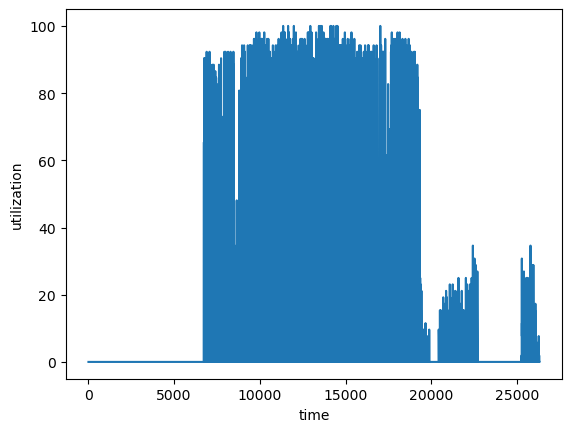

In [7]:
x = Input_hourly["time_id"]
y = Input_hourly["site1_utilization_percentage"]

plt.plot(x, y)

plt.xlabel('time')
plt.ylabel('utilization')

plt.show()

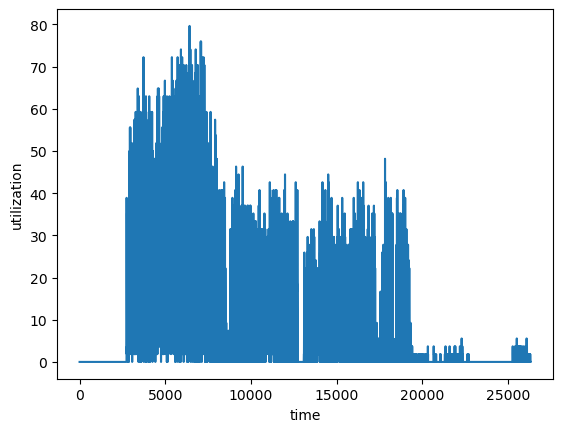

In [8]:
x = Input_hourly["time_id"]
y = Input_hourly["site2_utilization_percentage"]

plt.plot(x, y)

plt.xlabel('time')
plt.ylabel('utilization')

plt.show()

The time span of the data used as input must be reduced. The times at which one of the sites was not connected and the corona pandemic has falsified the data should not be considered, because they distort the values.

In [9]:
first_nonzero_timestamp = Input_hourly.loc[Input_hourly['site1_utilization_percentage'] > 0, 'time_id'].iloc[0]
Input_hourly = Input_hourly.loc[Input_hourly['time_id'] >= first_nonzero_timestamp]
Input_hourly = Input_hourly.loc[Input_hourly['date'] <= pd.to_datetime('2020-02-29').date()]
Input_hourly

,time_id,date,month,hour,dayOfTheWeek,site1_utilization_percentage,site2_utilization_percentage,temperature,precipitation
6725,6726,2018-10-08,10,6,0,5.77,11.11,13.000000,0.0
6726,6727,2018-10-08,10,7,0,36.54,18.52,14.333333,0.0
6727,6728,2018-10-08,10,8,0,36.54,48.15,17.000000,0.0
6728,6729,2018-10-08,10,9,0,36.54,66.67,18.000000,0.0
6729,6730,2018-10-08,10,10,0,36.54,61.11,20.000000,0.0
...,...,...,...,...,...,...,...,...,...
18955,18956,2020-02-29,2,19,5,0.00,0.00,14.000000,0.0
18956,18957,2020-02-29,2,20,5,0.00,0.00,14.000000,0.0
18957,18958,2020-02-29,2,21,5,0.00,0.00,13.000000,0.0
18958,18959,2020-02-29,2,22,5,0.00,0.00,13.000000,0.0


### Dummy values for categorical values

The categortcal features dayOfTheWeek, month and hour must be transformed into dummy values.

In [10]:
dayOfTheWeek_dummies = pd.get_dummies(Input_hourly['dayOfTheWeek'], prefix='day')
Input_hourly = pd.concat([Input_hourly, dayOfTheWeek_dummies], axis=1)

month_dummies = pd.get_dummies(Input_hourly['month'], prefix='month')
Input_hourly = pd.concat([Input_hourly, month_dummies], axis=1)

hour_dummies = pd.get_dummies(Input_hourly['hour'], prefix='hour')
Input_hourly = pd.concat([Input_hourly, hour_dummies], axis=1)

Input_hourly.to_csv('input_hourly.csv', index=False)

Input_hourly.sample(5)

,time_id,date,month,hour,dayOfTheWeek,site1_utilization_percentage,site2_utilization_percentage,temperature,precipitation,day_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
16467,16468,2019-11-18,11,3,0,0.00,0.00,13.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
13350,13351,2019-07-11,7,7,3,94.23,1.85,19.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
10228,10229,2019-03-03,3,4,6,0.00,1.85,12.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
11106,11107,2019-04-08,4,19,0,3.85,1.85,24.0,0.0,True,...,False,False,False,False,False,True,False,False,False,False
7831,7832,2018-11-23,11,7,4,1.92,0.00,11.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
